In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from math import pi
from PlotMaker import PlotMaker
from Network import RingNetwork, SimpleContextNetwork, MixedNetwork
from GridSearch import GridSearch

%matplotlib inline

In [2]:
plotmaker = PlotMaker()

## Mixed Network

In [12]:
# Runs the network
N = 100
N_c = 1
C = 1
N_cr = 40
J_cr = 0.06
K_inhib = 0.1
target_indices = np.array([N//2])
network = MixedNetwork(N, N_c, C, K_inhib, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros(input.size)
alphas[500:1000,] = 0
input_c[650:800] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

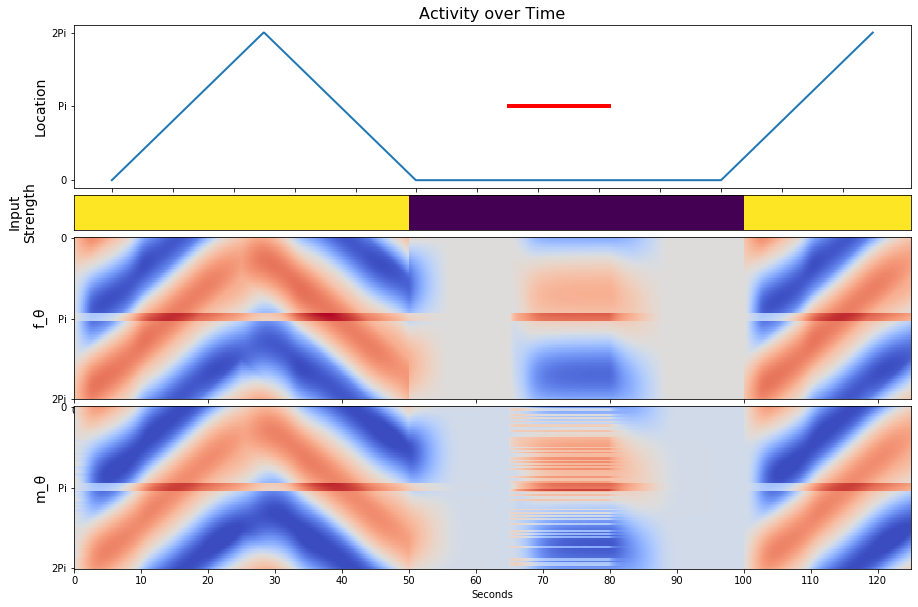

In [13]:
plotmaker.plot_main(
    input, alphas, f, input_c, target_indices/N, m
    )

In [25]:
#### N = 100
N = 100
N_c = 2
C = 1
N_cr = 70
J_cr = 0.06
K_inhib = 0.1
target_indices = np.array([N//2, 0])
network = MixedNetwork(N, N_c, C, K_inhib, N_cr, J_cr, target_indices)
num_steps = 1250
input = np.concatenate([
    np.linspace(0, 2*pi, num_steps//5),
    np.linspace(2*pi, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 0, num_steps//5),
    np.linspace(0, 2*pi, num_steps//5)
    ])
alphas = np.ones(input.size)*0.6
input_c = np.zeros((input.size, N_c))
alphas[500:1000,] = 0
input_c = np.zeros(input.size)
input_c[650:800] = 1
input_c[850:950] = 1
m, f, dmdt = network.simulate(input, input_c, alphas)

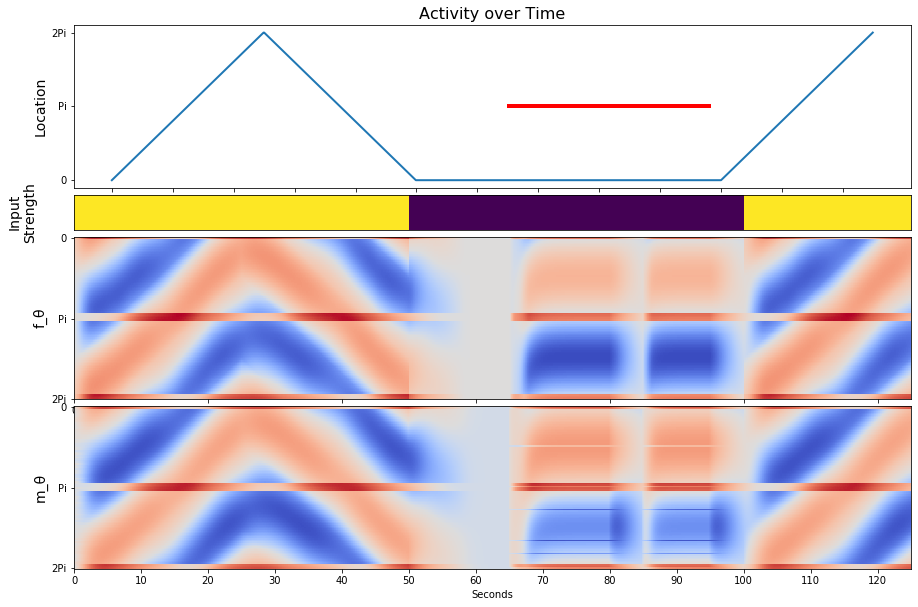

In [26]:
plotmaker.plot_main(
    input, alphas, f, input_c, target_indices/N, m
    )

In [ ]:
network.ring_indices.shape

In [ ]:
network.ring_indices[0]

In [ ]:
network.ring_indices[1]